# Challenge - Data Preparation and Exploration

![](https://images.unsplash.com/photo-1570651403445-54c2b0f568c0?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

In this challenge, you will deal with data from COVID-19 in Senegal. The dataset you will explore has been collected from Tweets of the Health Ministry of Senegal since the outbreak of COVID-19 early March 2020.

In this notebook, you will have to load the dataset, pre-process it and extract some interesting charts.

**Q1**: Load the following dataset: https://raw.githubusercontent.com/maelfabien/COVID-19-Senegal/master/COVID_Senegal.csv

In [92]:
# TODO : load data
import pandas as pd
import os

# df = pd.read_csv(
#     os.path.join('..', 'input', 'COVID_Senegal.csv'),
#     sep=";",
#     index_col='Date',
#     parse_dates=True,
#     date_format="%d.%m.%y"
# ).reset_index()

df = pd.read_csv(
    os.path.join('..', 'input', 'COVID_Senegal.csv'),
    sep=";"
)

In [31]:
df.head()

,Date,Positif,Negatif,Age,Homme,Femme,Décédé,Guéri,Nationalité,Resident Senegal,Ville,Facteur,Source/Voyage,Hopital,Temps Hospitalisation (j)
0,02.03.20,1,0,68.0,1.0,0.0,0.0,1.0,France,Oui,Dakar,Importé,France,FANN,4.0
1,03.03.20,0,1,NaN,1.0,0.0,0.0,1.0,Gambie,Non,Dakar,Importé,Espagne,FANN,NaN
2,03.03.20,1,0,80.0,1.0,0.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,10.0
3,04.03.20,1,0,68.0,0.0,1.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,15.0
4,04.03.20,1,0,33.0,0.0,1.0,0.0,1.0,Angleterre,Non,Dakar,Importé,Angleterre,FANN,7.0


In [93]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%y')

**Q2**: Compute the total number of positive cases, negative cases, deaths and healed cases.

In [58]:
df[['Positif', 'Negatif', 'Décédé', 'Guéri']].sum()

Positif     222.0
Negatif    1774.0
Décédé        2.0
Guéri        81.0
dtype: float64

**Q3**: With Matplotlib, compute the evolution of the number of positive cases in Senegal

In [94]:
df.groupby(['Date'])[['Positif', 'Negatif', 'Décédé', 'Guéri']]\
    .sum().cumsum()\
    .reset_index()\
    .sort_values(by='Date', ascending=False)\
    .head(10)

,Date,Positif,Negatif,Décédé,Guéri
33,2020-04-05,222,1774,2.0,81.0
32,2020-04-04,219,1685,2.0,81.0
31,2020-04-03,207,1520,2.0,81.0
30,2020-04-02,195,1379,2.0,81.0
29,2020-04-01,190,1297,2.0,81.0
28,2020-03-31,175,1117,2.0,81.0
27,2020-03-30,161,1033,1.0,81.0
26,2020-03-29,141,966,1.0,81.0
25,2020-03-28,130,826,1.0,81.0
24,2020-03-27,119,739,1.0,81.0


In [71]:
df_cumulative_sums = df.groupby(['Date'])[['Positif', 'Negatif', 'Décédé', 'Guéri']]\
    .sum().cumsum().reset_index()

In [72]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date', ylabel='Cumulative number of positive cases'>

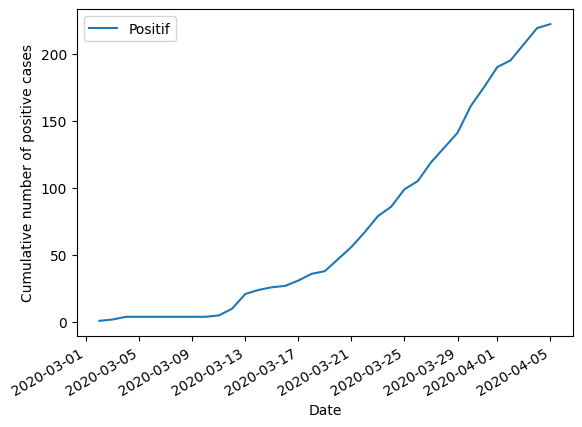

In [76]:
df_cumulative_sums.plot(
    x="Date",
    y="Positif",
    kind='line',
    ylabel='Cumulative number of positive cases'
)

**Q4**: With Matplotlib, compute the evolution of the number of active cases in Senegal (pos - heal).

<Axes: xlabel='Date', ylabel='Cumulative number of healed cases'>

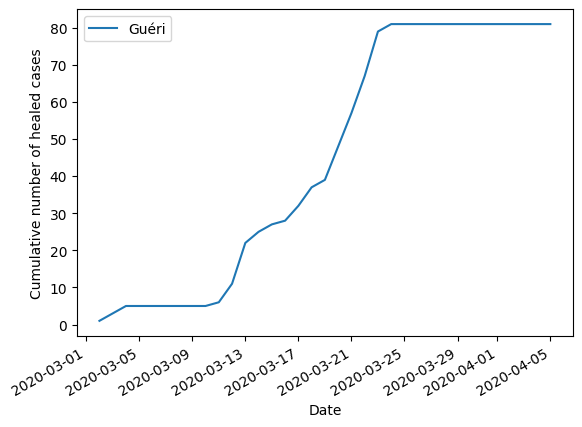

In [77]:
df_cumulative_sums.plot(
    x="Date",
    y="Guéri",
    kind='line',
    ylabel='Cumulative number of healed cases'
)

**Q5**: Draw the same 2 plots with Altair

In [97]:
import altair as alt

In [98]:
alt.Chart(df_cumulative_sums).mark_line().encode(
    x='Date',
    y='Positif'
)


alt.Chart(...)

In [99]:
alt.Chart(df_cumulative_sums).mark_line().encode(
    x='Date',
    y='Guéri'
)

alt.Chart(...)

**Q6**: Combine both lines on the same Altair plot (you might need to use the transform_fold option

In [105]:
alt.Chart(df_cumulative_sums)\
    .mark_line()\
    .transform_fold(['Positif', 'Guéri'])\
    .encode(
        x='Date:T',
        y='value:Q',
        color='key:N'
    )

alt.Chart(...)

**Q7**: Build a dataframe with the evolution of the number of imported, contact and community cases in Senegal.

In [165]:
df['Facteur'].value_counts()

Facteur
Contact       125
Importé        86
Communauté     12
Name: count, dtype: int64

In [209]:
df_cumulative_factors = pd.get_dummies(df[['Date', 'Facteur']], prefix='', prefix_sep='',dtype=int)\
    .groupby(['Date'])[['Communauté', 'Contact', 'Importé']]\
    .sum()\
    .cumsum()\
    .reset_index()
    
df_cumulative_factors.sort_values(by='Date', ascending=False).head(10)

,Date,Communauté,Contact,Importé
33,2020-04-05,12,125,86
32,2020-04-04,11,123,86
31,2020-04-03,10,113,85
30,2020-04-02,10,108,78
29,2020-04-01,10,105,76
28,2020-03-31,10,91,75
27,2020-03-30,10,79,74
26,2020-03-29,9,65,69
25,2020-03-28,9,57,65
24,2020-03-27,8,49,63


**Q8**: What is the total number of imported cases? Of contact or community cases?

In [216]:
df['Facteur'].value_counts()

Facteur
Contact       125
Importé        86
Communauté     12
Name: count, dtype: int64

**Q9**: Plot the evolution of these metrics using Matplotlib

<Axes: xlabel='Date', ylabel='Cumulative number of factors'>

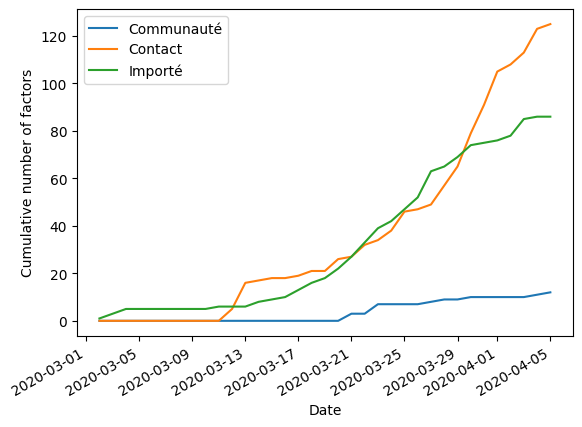

In [210]:
df_cumulative_factors.plot(
    x="Date",
    y=['Communauté', 'Contact', 'Importé'],
    kind='line',
    ylabel='Cumulative number of factors'
)

**Q10**: Plot the same information with Altair

In [215]:
alt.Chart(df_cumulative_factors)\
    .mark_line()\
    .transform_fold(['Communauté', 'Contact', 'Importé'])\
    .encode(
        x='Date:T',
        y='value:Q',
        color='key:N'
    )

alt.Chart(...)

**Q11**: With Altair, do a histogram of the origin of infection (country for contact cases)

In [218]:
df.head()

,Date,Positif,Negatif,Age,Homme,Femme,Décédé,Guéri,Nationalité,Resident Senegal,Ville,Facteur,Source/Voyage,Hopital,Temps Hospitalisation (j)
0,2020-03-02,1,0,68.0,1.0,0.0,0.0,1.0,France,Oui,Dakar,Importé,France,FANN,4.0
1,2020-03-03,0,1,NaN,1.0,0.0,0.0,1.0,Gambie,Non,Dakar,Importé,Espagne,FANN,NaN
2,2020-03-03,1,0,80.0,1.0,0.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,10.0
3,2020-03-04,1,0,68.0,0.0,1.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,15.0
4,2020-03-04,1,0,33.0,0.0,1.0,0.0,1.0,Angleterre,Non,Dakar,Importé,Angleterre,FANN,7.0


In [250]:
df[df['Source/Voyage'].notna() & df['Positif'] == 1]['Source/Voyage'].value_counts(dropna=False)

Source/Voyage
Italie        21
France         6
Espagne        2
Angleterre     1
Name: count, dtype: int64

In [253]:
df_infection_origin = df.loc[df['Source/Voyage'].notna() & df['Positif'] == 1]

df_infection_origin.head()

,Date,Positif,Negatif,Age,Homme,Femme,Décédé,Guéri,Nationalité,Resident Senegal,Ville,Facteur,Source/Voyage,Hopital,Temps Hospitalisation (j)
0,2020-03-02,1,0,68.0,1.0,0.0,0.0,1.0,France,Oui,Dakar,Importé,France,FANN,4.0
2,2020-03-03,1,0,80.0,1.0,0.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,10.0
3,2020-03-04,1,0,68.0,0.0,1.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,15.0
4,2020-03-04,1,0,33.0,0.0,1.0,0.0,1.0,Angleterre,Non,Dakar,Importé,Angleterre,FANN,7.0
18,2020-03-11,1,0,NaN,1.0,0.0,0.0,1.0,Senegal,Non,Dakar,Importé,Italie,FANN,12.0


In [245]:
alt.Chart(df_infection_origin)\
    .mark_bar()\
    .encode(
        x='Source/Voyage',
        y='count()'
    )

alt.Chart(...)

**Q12**: Free exploration. Gather some insights from other unexplored columns.